### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [59]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), 
("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]



In [60]:
edad_altura = pd.DataFrame (lista_alumnos)

In [61]:
edad_altura.rename(columns={ edad_altura.columns[0]: 'Nombre', edad_altura.columns[1]: 'Edad', edad_altura.columns[2]: 'Altura' }, inplace = True)


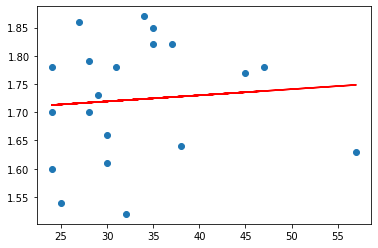

In [62]:
X = edad_altura.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
y = edad_altura.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

## Teniendo en cuenta la matriz de correlación (Pearson: 0.087) creo que no es un buen análisis. Si no hay asociación entre ambas variables no tiene interés predecir una a partir de la otra

In [75]:
# Errores del modelo. % de aciertos de toda la base
linear_regressor.score(X,y)*100

0.758680227148234

In [76]:
# secante de toda la base
linear_regressor.intercept_

array([1.68685622])

In [77]:
# pendiente de toda la base
linear_regressor.coef_

array([[0.00108011]])

### Dividimos la base en una parte de entrenamiento y otra de test


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [64]:
# establecemos un modelo de regresión lineal
lm = LinearRegression(n_jobs=-1)

In [65]:
#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [78]:
# % de aciertos de la muestra de entrenamiento
lm.score(X_train, y_train) *100

8.217788480813226e-05

In [66]:
# secante de la muestra de entrenamiento
lm.intercept_

array([1.72403163])

In [67]:
# coeficiente de la muestra de entrenamiento
lm.coef_

array([[1.01552299e-05]])

In [79]:
# % de aciertos de la muestra para test
lm.score(X_test, y_test) *100

-0.610578465097511

In [71]:
from sklearn import metrics

In [72]:
predictions = lm.predict(X_test)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10997207311765561
MSE: 0.013205138423544045
RMSE: 0.11491361287307977


<AxesSubplot:>

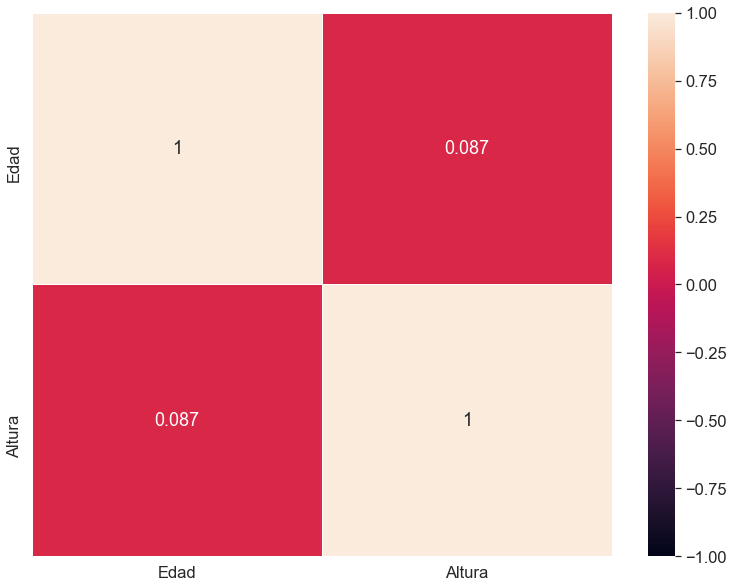

In [51]:
# matriz de correlación
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(edad_altura.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)
           
# LOS DATOS NO ESTÁN CORRELACIONADOS


In [52]:
# ALTURA MULTPLICADA POR DOS
edad_altura['Altura'] = edad_altura['Altura']*2

In [53]:
Altura=edad_altura


<AxesSubplot:>

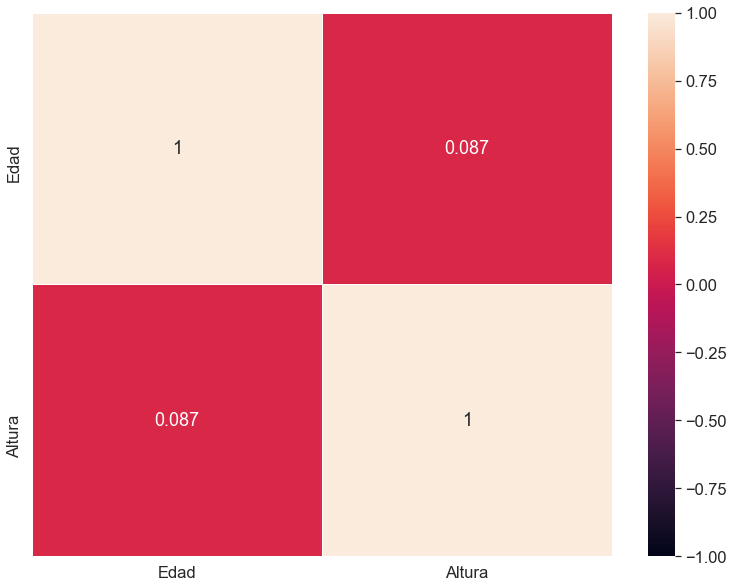

In [54]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(Altura.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

# NO VARÍA LA CORRELACIÓN

In [55]:
edad_altura['Edad'] = edad_altura['Edad']*2

In [56]:
Edad = edad_altura

<AxesSubplot:>

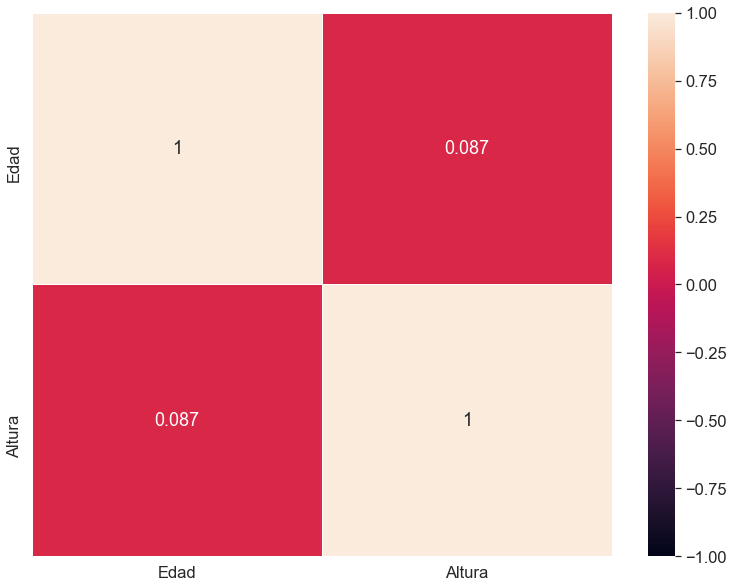

In [57]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(Edad.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

# NO VARÍA LA CORRELACIÓN